Clothing_Categorization

Parker Williamson
1/22/2018

This program takes a set of training data and classification data and using different methods of computer vision categorizes the test set based on the training set. The data that was used to analyze different techniques was clothing data from https://www.kaggle.com/zalando-research/fashionmnist.

(used https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=1493&v=mynJtLhhcXk as a template for CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import tensorflow as tf
import os
import sys
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [2]:
%matplotlib inline

Dictionary definitions shows the true categories that the dataset lists

In [3]:
definitions = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

open data from the adjacent rawData folder

In [4]:
#reset directory using next line
#os.chdir('C:/Users/Parker/Documents/2018/SpringBoard/clothingCategorization/DataWrangling')

abspath = os.path.abspath(os.curdir)
print(abspath)
os.chdir("..")
path = os.path.abspath(os.curdir)
print(path)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataVisualization
C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization


In [5]:
train_data = genfromtxt('rawData/fashion-mnist_train.csv', skip_header=True, delimiter=',')

In [ ]:
test_data = genfromtxt('rawData/fashion-mnist_test.csv', skip_header=True, delimiter=',')

In [7]:
os.chdir(abspath)
print(abspath)

C:\Users\Parker\Documents\2018\SpringBoard\clothingCategorization\DataVisualization


In [8]:
classification,rawData =np.split(train_data,indices_or_sections=[1],axis=1)

Select preprocessing mode

In [15]:
mode=''

In [ ]:
if mode=='Normalize':
    preclassifier_data = rawData.astype('float32')/255 #preprocessing.normalize(rawData)
elif mode=='Standardize':
    preclassifier_data = (rawData - np.mean(rawData, axis=1, keepdims=1)) / np.std(rawData, axis=1, keepdims=1)
else:
    preclassifier_data = rawData

In [17]:
classification_test,rawData_test =np.split(test_data,indices_or_sections=[1],axis=1)

In [ ]:
if mode=='Normalize':
    preclassifier_data_test = rawData_test.astype('float32')/255 #preprocessing.normalize(rawData_test)
elif mode=='Standardize':
    preclassifier_data_test = (rawData_test - np.mean(rawData_test, axis=1, keepdims=1)) / np.std(rawData_test, axis=1, keepdims=1)
else:
    preclassifier_data_test = rawData_test

Convolutional Neural Network below

In [19]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train y_train), (x_test, y_test) = mnist.load_data()
x_train = preclassifier_data
y_train = classification.ravel()
x_test = preclassifier_data_test
y_test = classification_test.ravel()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('preprocessing: ', mode)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 493s 8ms/step - loss: 0.6112 - acc: 0.7845 - val_loss: 0.3700 - val_acc: 0.8691
Epoch 2/12
60000/60000 [==============================] - 517s 9ms/step - loss: 0.3957 - acc: 0.8612 - val_loss: 0.3102 - val_acc: 0.8897
Epoch 3/12
60000/60000 [==============================] - 546s 9ms/step - loss: 0.3467 - acc: 0.8767 - val_loss: 0.2833 - val_acc: 0.8995
Epoch 4/12
60000/60000 [==============================] - 946s 16ms/step - loss: 0.3152 - acc: 0.8896 - val_loss: 0.2829 - val_acc: 0.8979
Epoch 5/12
60000/60000 [==============================] - 1083s 18ms/step - loss: 0.2929 - acc: 0.8966 - val_loss: 0.2570 - val_acc: 0.9093
Epoch 6/12
60000/60000 [==============================] - 846s 14ms/step - loss: 0.2773 - acc: 0.9005 - val_loss: 0.2458 - val_acc: 0.9111
Epoch 7/12
60000/60000 [=====================

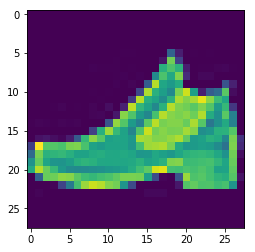

PHASE 1


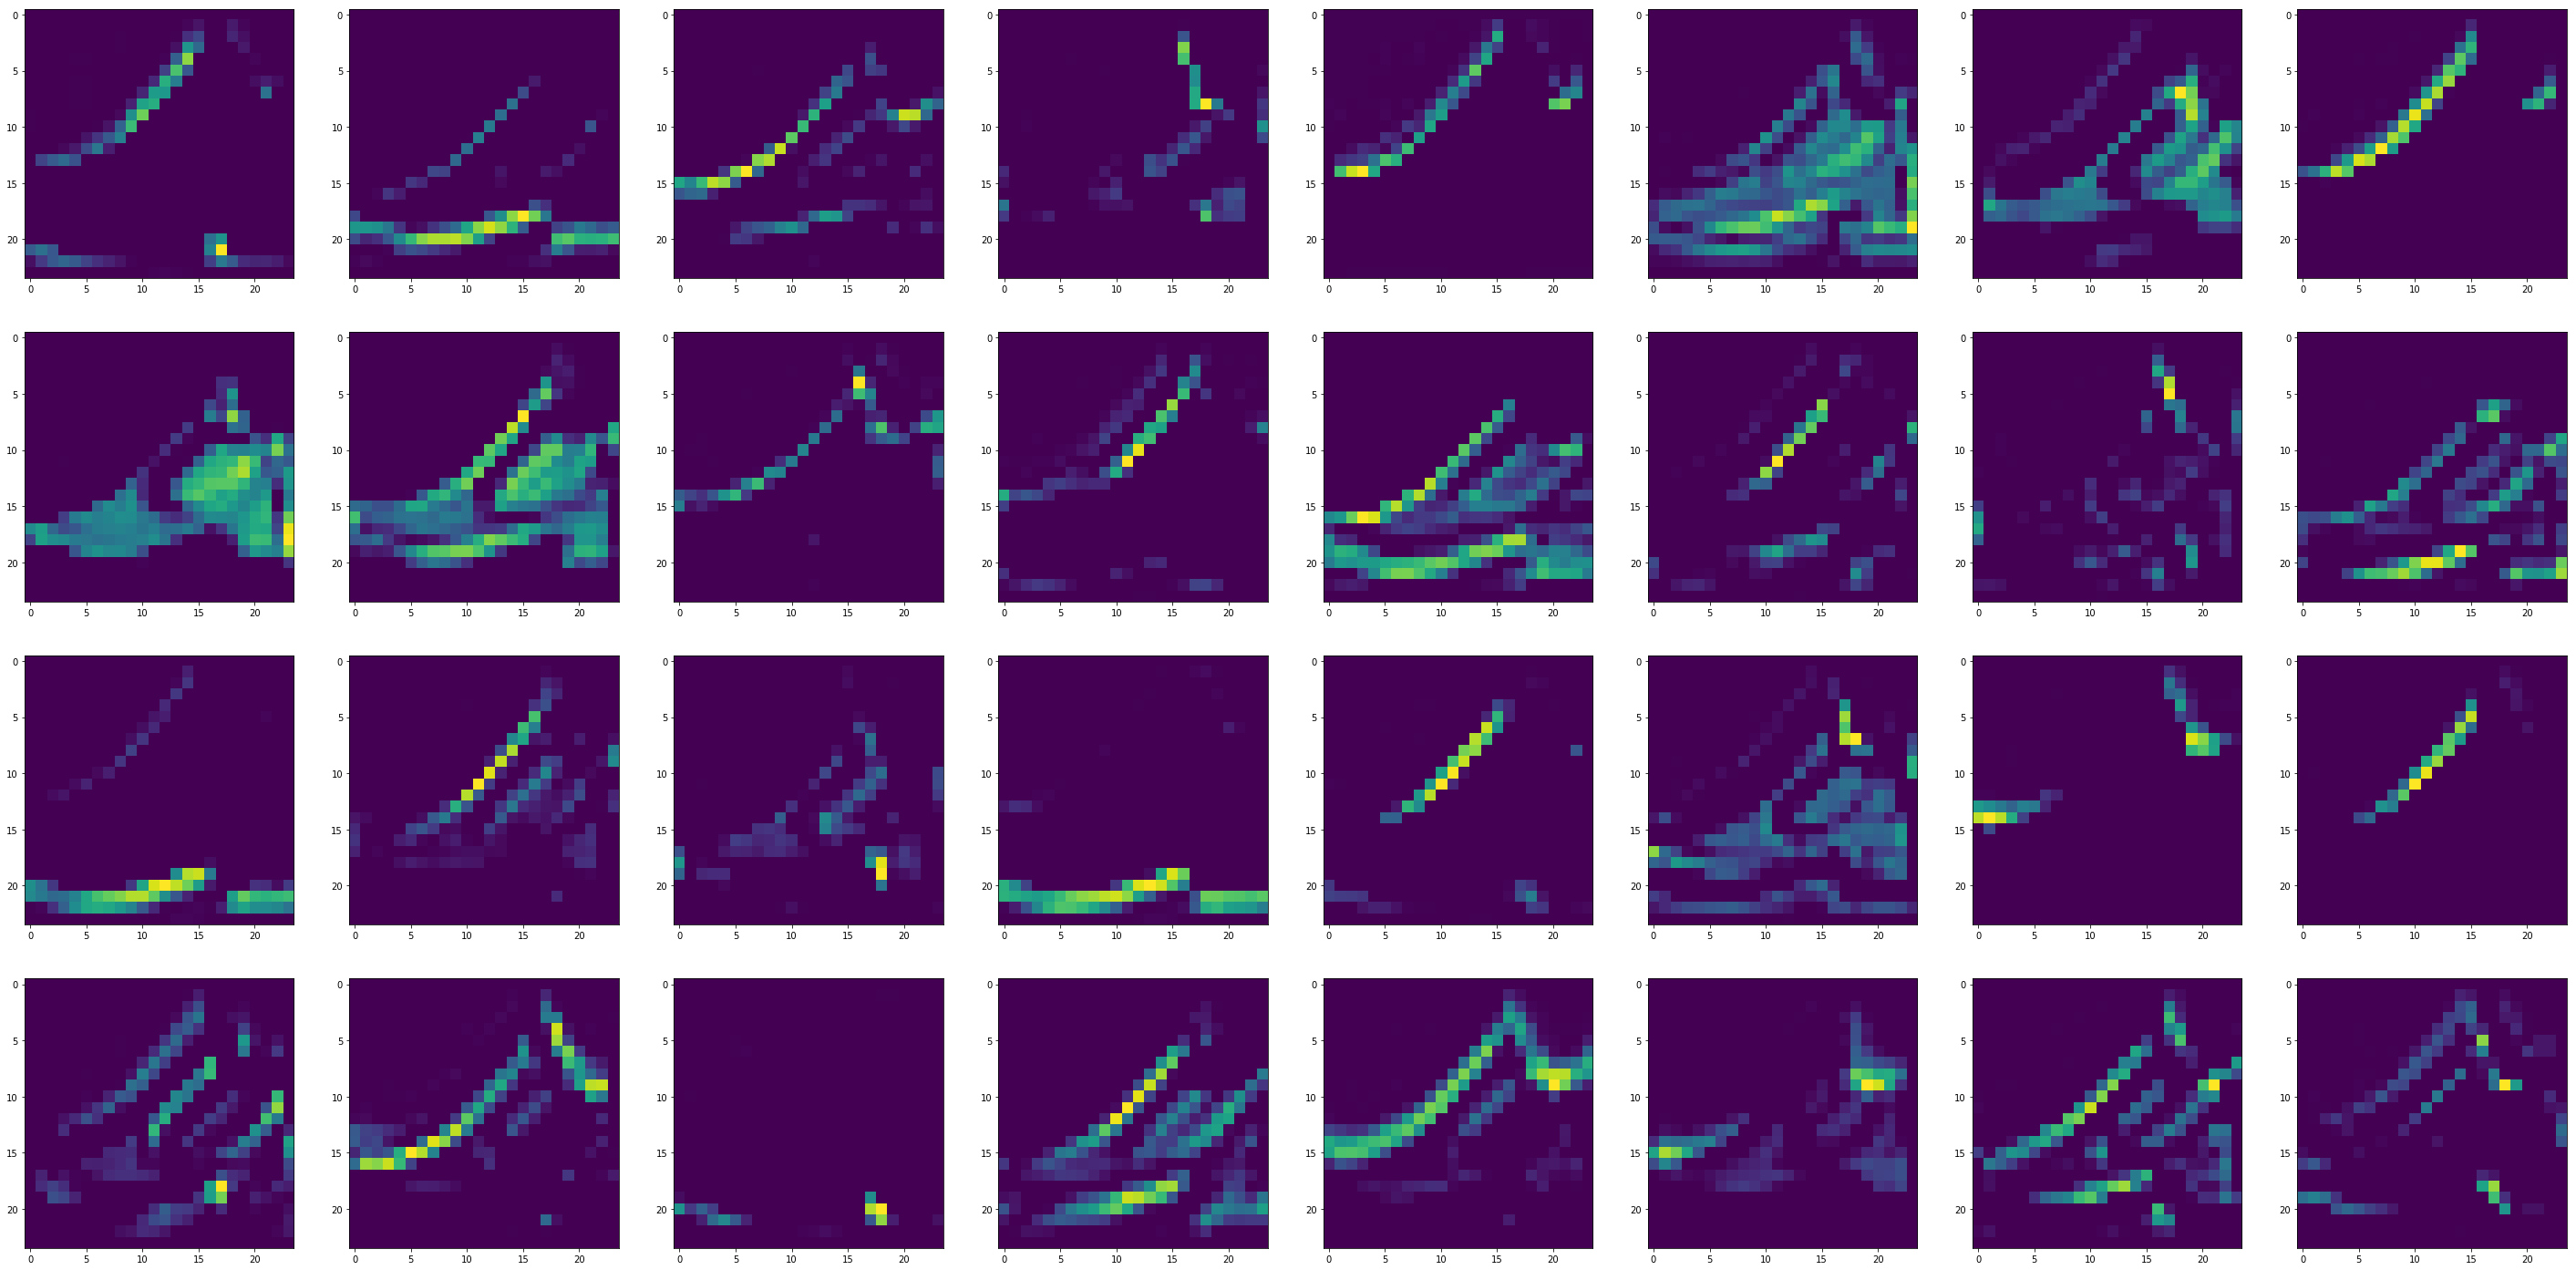

PHASE 2


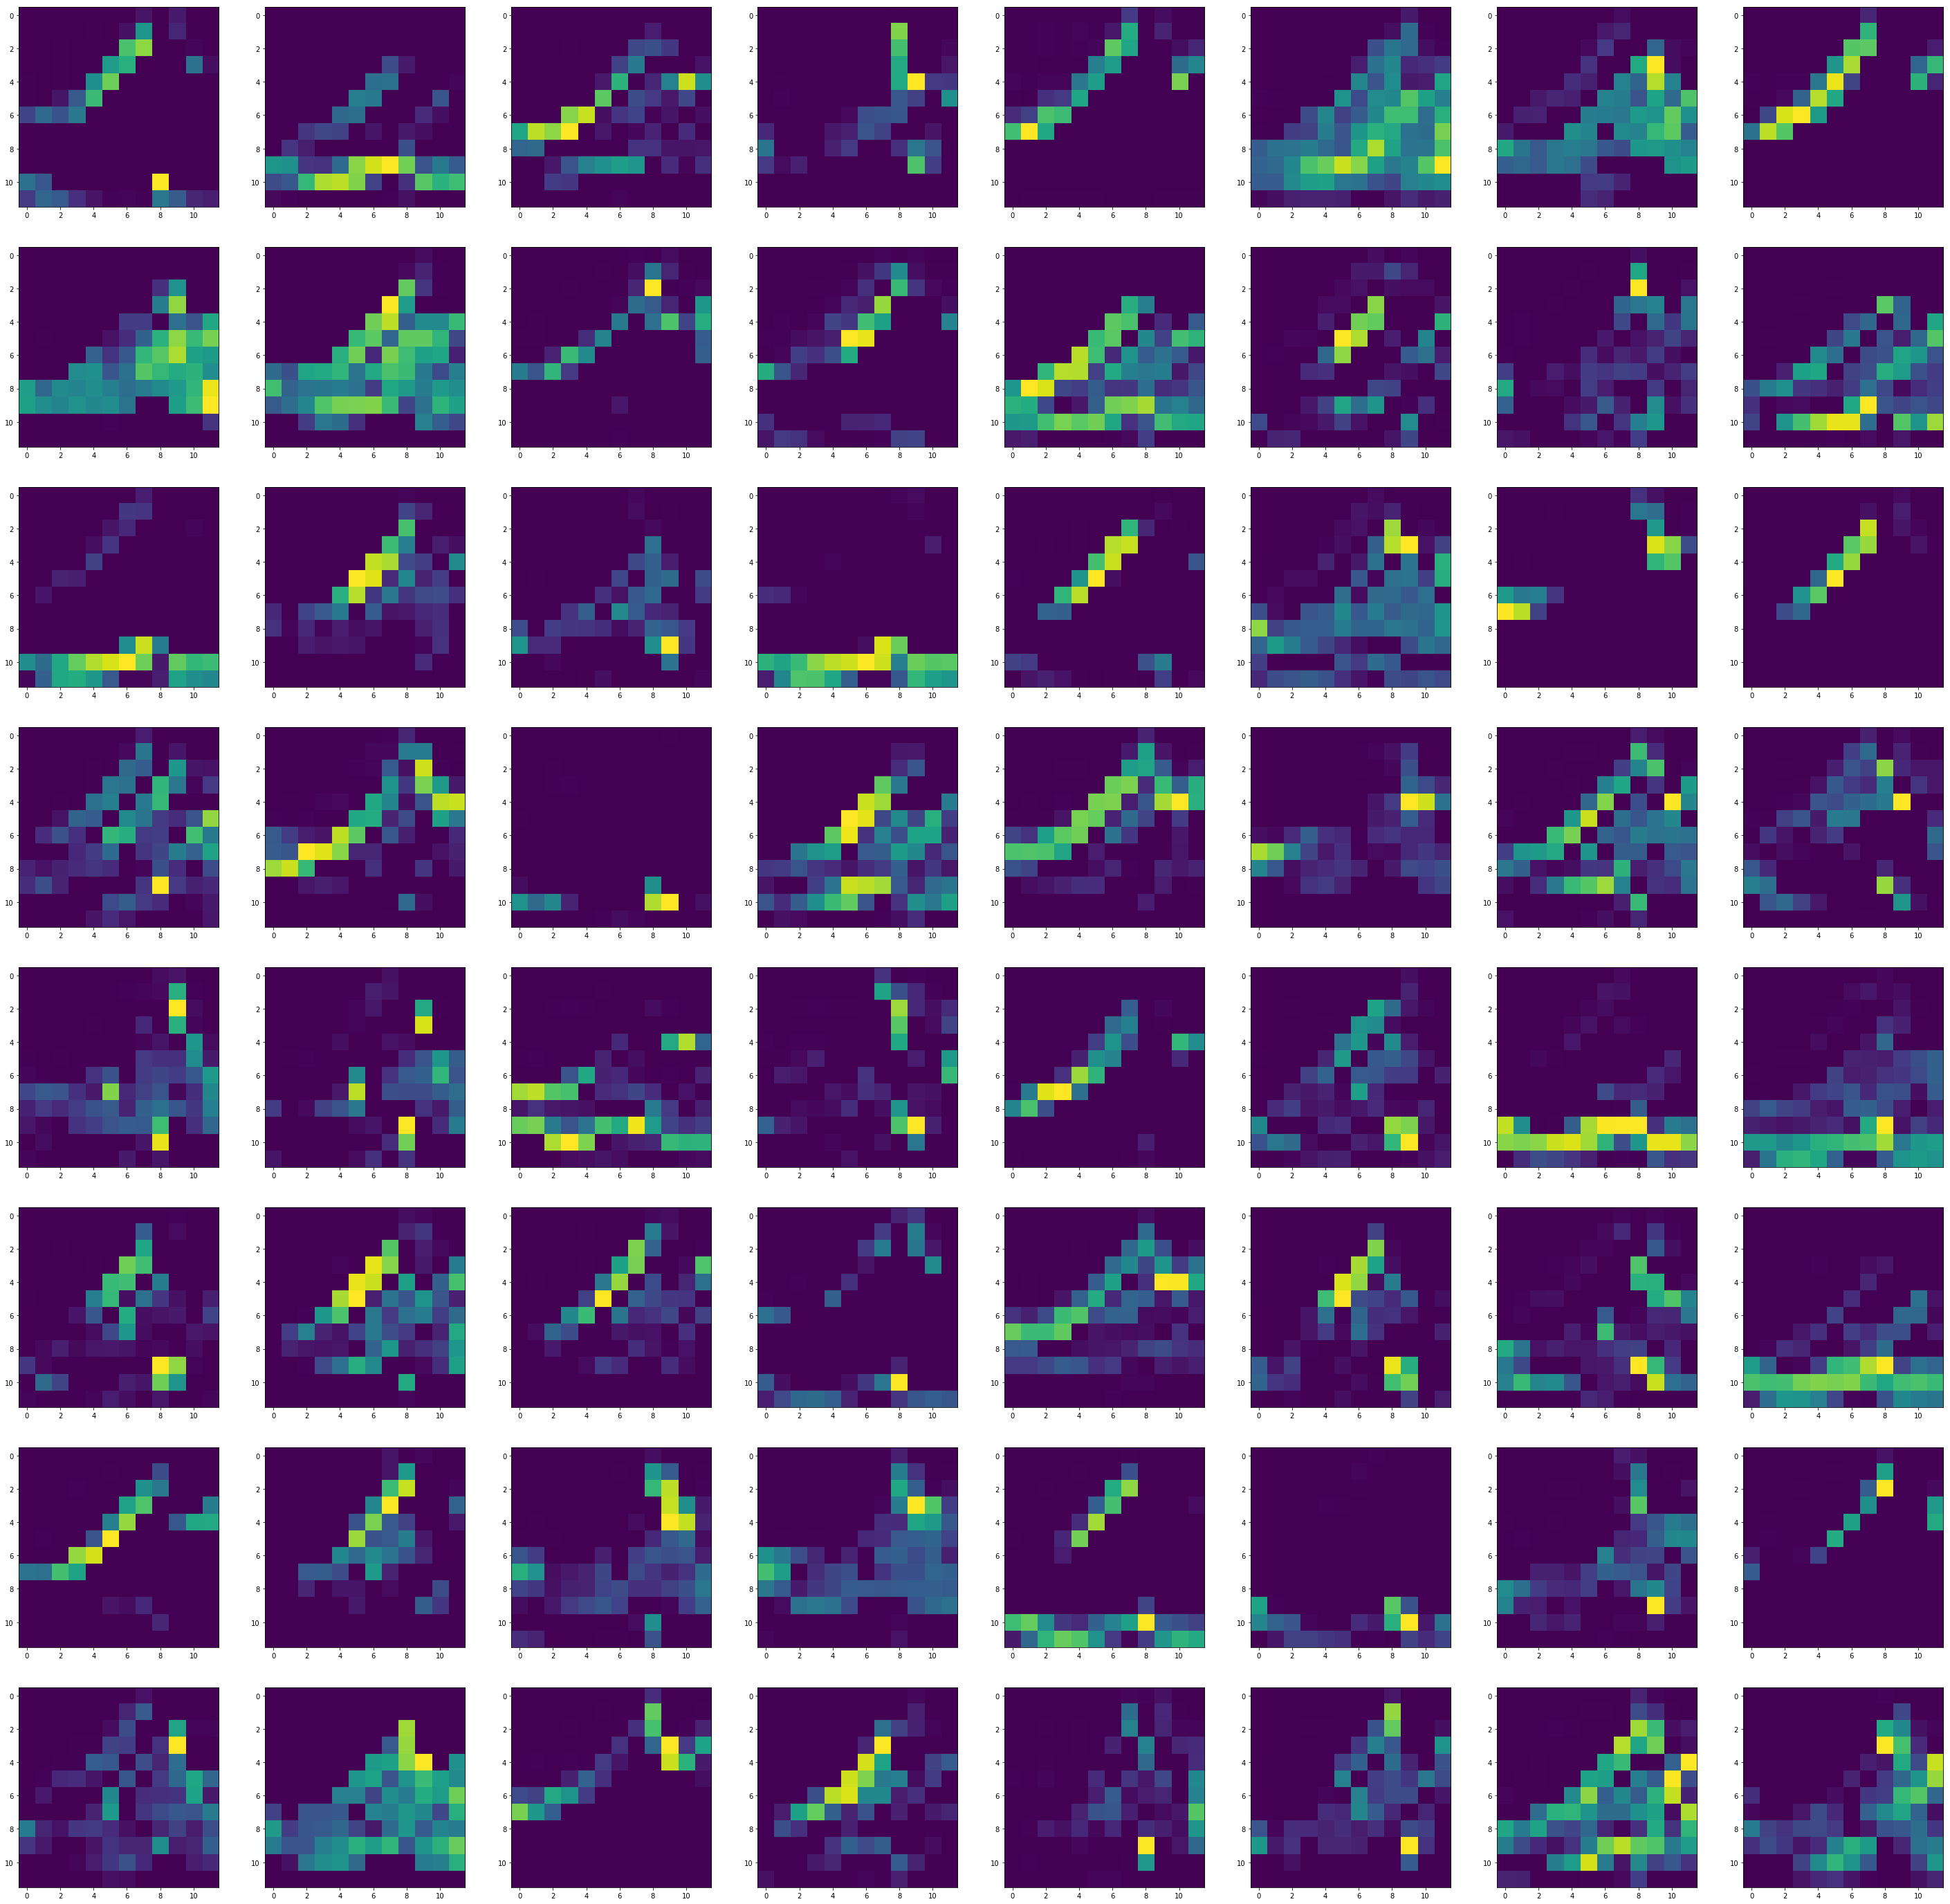

In [78]:
#adjust this section to explore different images and end points of the filter
img_num = 1
#output_layer_number = 2

plt.imshow(preclassifier_data[img_num][0:785].reshape((28,28)))
plt.show()

for phase in range(1,3):
    print('PHASE {}'.format(phase))
    output_layer_number = phase
    filter_test = preclassifier_data[img_num][0:785].reshape((1,28,28,1))
    # with a Sequential model
    get_3rd_layer_output = K.function([model.layers[0].input],
                                      [model.layers[output_layer_number].output])
    layer_output = get_3rd_layer_output([filter_test])[0]
    
    fig_0 = plt.figure(figsize=(50, 25))  # width, height in inches
    fig_more = [plt.figure(figsize=(50, 50)),plt.figure(figsize=(50, 50))]  # width, height in inches
    if phase==1:
        for num in range(32):
            sub_0 = fig_0.add_subplot(4, 8, num + 1)
            sub_0.imshow(layer_output[0,:,:,num], interpolation='nearest')
        plt.show()
    else:
        for num in range(64):
            sub = fig_more[phase-1].add_subplot(8, 8, num + 1)
            sub.imshow(layer_output[0,:,:,num], interpolation='nearest')
        plt.show()
    
